In [1]:
# Importing the essential Python Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix

In [2]:
# Importing the Parkinson's Telemedicine dataset

df = pd.DataFrame.from_csv('parkinsons_updrs.data.csv')

In [3]:
# Checking the first 5 columns of the dataset

df.head()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,,,
1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
# Defining the dependent and the predictors or independent variables

dependent = 'total_UPDRS'
predictors = [colname for colname in df.columns if colname not in ['motor_UPDRS','total_UPDRS']]

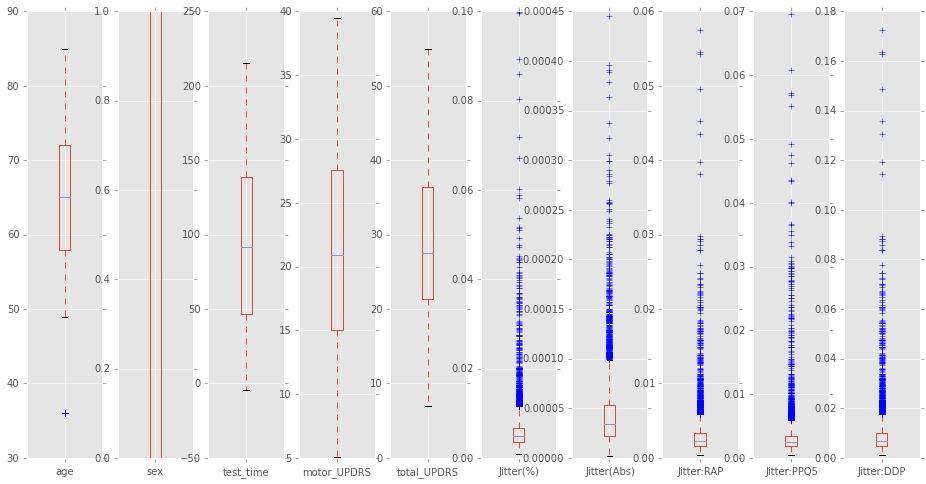

In [5]:
# Creating Boxplots for the firs 10 columns of the dataset 

boxplots1 = df[df.columns[:10]].plot(subplots=True, kind='box', figsize=(16,8))

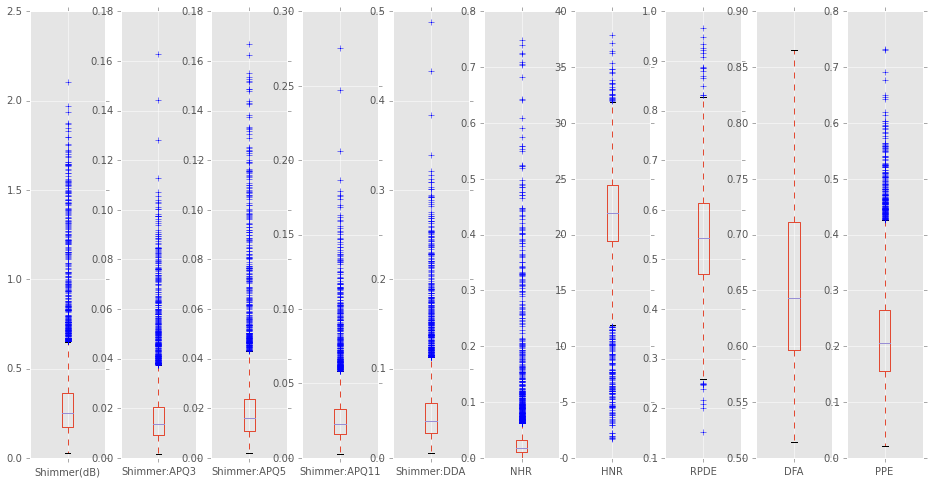

In [6]:
# Creating Boxplots for the remainder columns of the dataset

boxplots2 = df[df.columns[11:]].plot(subplots=True, kind='box', figsize=(16,8))

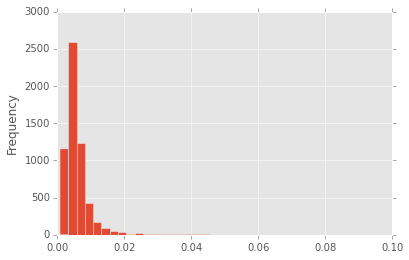

In [7]:
# Plotting a histogram for one of the predictor variable

hist_ex = df['Jitter(%)'].plot(kind='hist', bins=40)

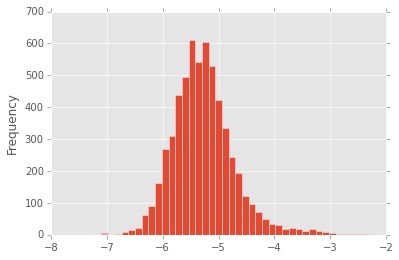

In [8]:
# Taking a Log and plotting a histogram of the same predictor variable

hist_log_ex = df['Jitter(%)'].apply(np.log)

hist_log_ex.plot(kind='hist', bins=40)

/home/srikanth/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


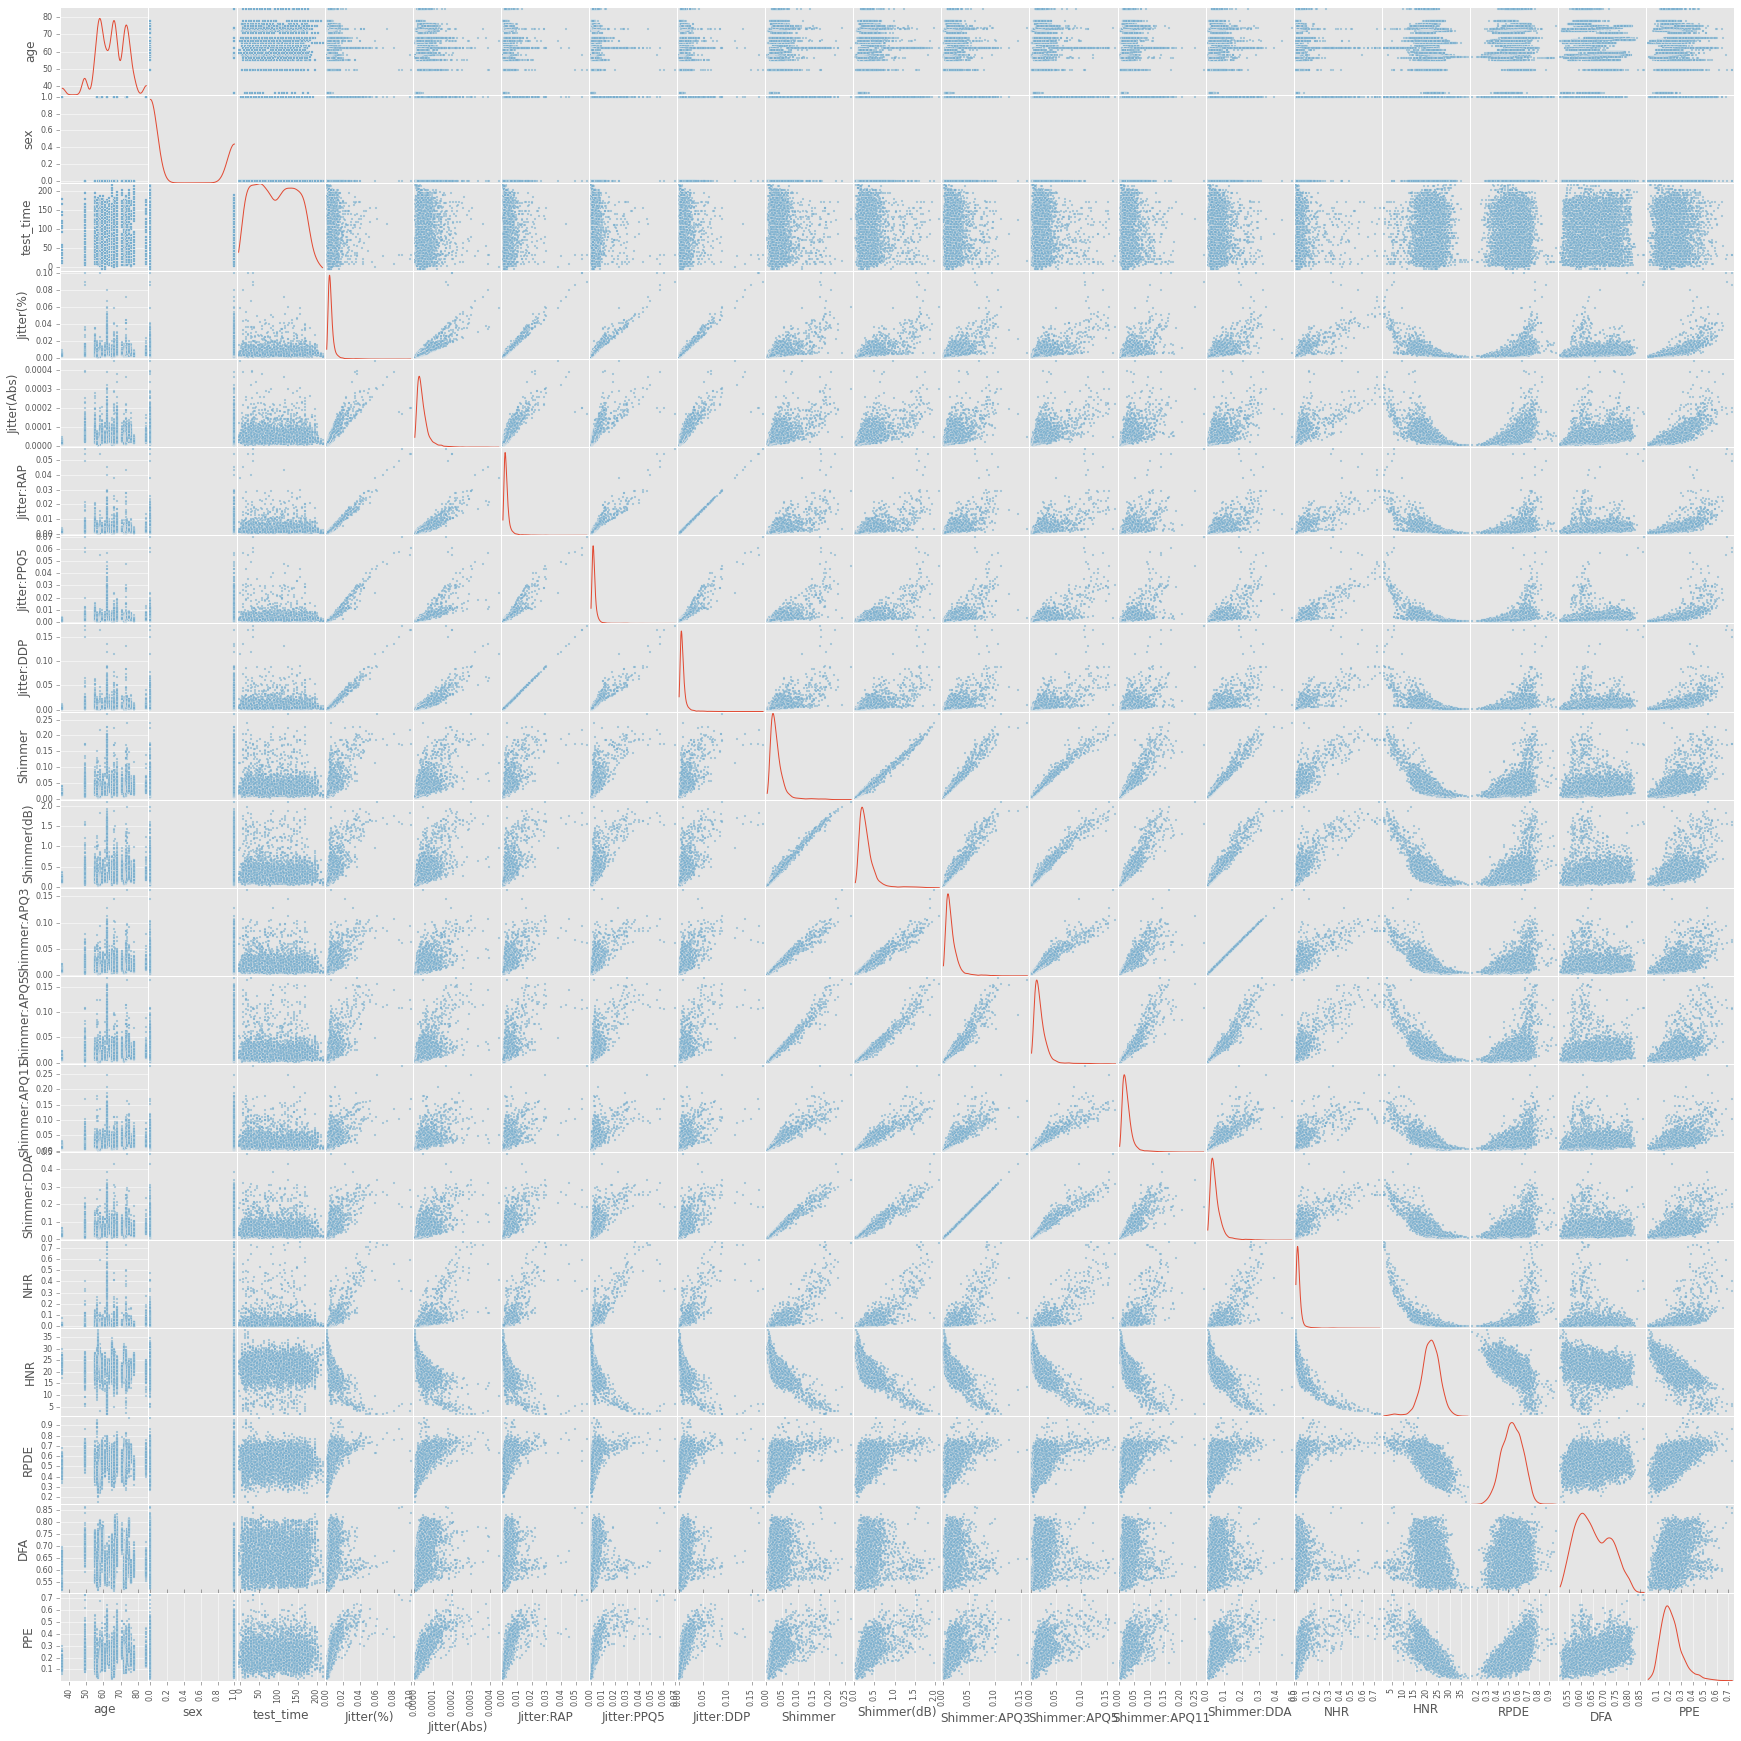

In [9]:
# Plotting a scatter matrix to check for multicollinearity in the predictor variables

plot = scatter_matrix(df[predictors], diagonal='kde', figsize=(30,30))

In [10]:
# Eliminating the predictor variables with high multicollinearity

predictors.remove('Jitter:DDP')
predictors.remove('Shimmer:DDA')

In [11]:
# Taking a log of the Jitter, Shimmer, NHR and PPE predictor variables

predictors_to_log = [predictor for predictor in predictors if any(lookforstring in predictor for lookforstring in ('Shimmer','Jitter','NHR', 'PPE'))]

In [12]:
# Defining the series of columns to which a log function has to be applied

def log_columns(series):
    if series.name in predictors_to_log:
        return np.log(series)
    else:
        return series
    
final_df = df.apply(log_columns)

In [13]:
#Ordinary Least Squares Estimation

model = sm.OLS(final_df[dependent], exog=final_df[predictors])

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     3159.
Date:                Sat, 16 Jan 2016   Prob (F-statistic):               0.00
Time:                        01:16:23   Log-Likelihood:                -21685.
No. Observations:                5875   AIC:                         4.340e+04
Df Residuals:                    5858   BIC:                         4.352e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
age               0.3279      0.015     21.868      0.000         0.299     0.357
sex              -4.0930      0.379    -10.786      0.000        -4.837    -3.349
test_time         0.0171      0.002      7.183      0.000         0.012     0.022
Jitter(%)         0.8221      1.591      0.517      0.605        -2.297     3.941
Jitter(Abs)      -4.8737      0.608     -8.012      0.000        -6.066    -3.681
Jitter:RAP        5.4035      1.128      4.790      0.000         3.192     7.615
Jitter:PPQ5      -1.7370      1.143     -1.520      0.129        -3.978     0.504
Shimmer           1.9208      3.100      0.620      0.536        -4.157     7.999
Shimmer(dB)       0.8888      1.556      0.571      0.568        -2.162     3.940
Shimmer:APQ3     -2.3216      1.841     -1.261      0.207        -5.931     1.287
Shimmer:APQ5     -8.9046      1.970     -4.520      0.000       -12.766    -5.043
Shimmer:APQ11     6.6767      1.268      5.266      0.000         4.191     9.162
NHR              -1.4431      0.363     -3.972      0.000        -2.155    -0.731
HNR              -0.8093      0.082     -9.879      0.000        -0.970    -0.649
RPDE              7.8670      1.762      4.466      0.000         4.413    11.321
DFA             -27.0267      2.008    -13.459      0.000       -30.963   -23.090
PPE               2.4926      0.634      3.932      0.000         1.250     3.735
==============================================================================
Omnibus:                      172.258   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.346
Skew:                           0.400   Prob(JB):                     5.09e-39
Kurtosis:                       2.718   Cond. No.                     3.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""